In [2]:
# Import of all relevant libraries: 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
from sklearn.metrics import silhouette_samples 
from matplotlib import cm 
%matplotlib inline 

In [3]:
df = pd.read_csv('Invistico_Airline.csv') #Loading the dataset.

df #Look into the loaded data. 

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [7]:
df.info() #Brief overview of dataframe and its data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  int32  
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [6]:
mapping = {'satisfied': 1, 'dissatisfied': 0}
df['satisfaction'] = df['satisfaction'].map(mapping).astype(int)

In [8]:
df.describe() #extended overview

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,0.547328,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,0.497757,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,0.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,1.000000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,1.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
#Create a list of all numeric attributes to create a reusable code.
attributes_num = []
for i in df.columns:
    if df[i].dtype == "float64" or df[i].dtype == "int64":
        attributes_num.append(i)
attributes_num

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>,
        <Axes: title={'center': 'Seat comfort'}>,
        <Axes: title={'center': 'Departure/Arrival time convenient'}>],
       [<Axes: title={'center': 'Food and drink'}>,
        <Axes: title={'center': 'Gate location'}>,
        <Axes: title={'center': 'Inflight wifi service'}>,
        <Axes: title={'center': 'Inflight entertainment'}>],
       [<Axes: title={'center': 'Online support'}>,
        <Axes: title={'center': 'Ease of Online booking'}>,
        <Axes: title={'center': 'On-board service'}>,
        <Axes: title={'center': 'Leg room service'}>],
       [<Axes: title={'center': 'Baggage handling'}>,
        <Axes: title={'center': 'Checkin service'}>,
        <Axes: title={'center': 'Cleanliness'}>,
        <Axes: title={'center': 'Online boarding'}>],
       [<Axes: title={'center': 'Departure Delay in Minutes'}>,
        <Axes: title={'center': 'Arrival Delay in Minutes'}>, <Axe

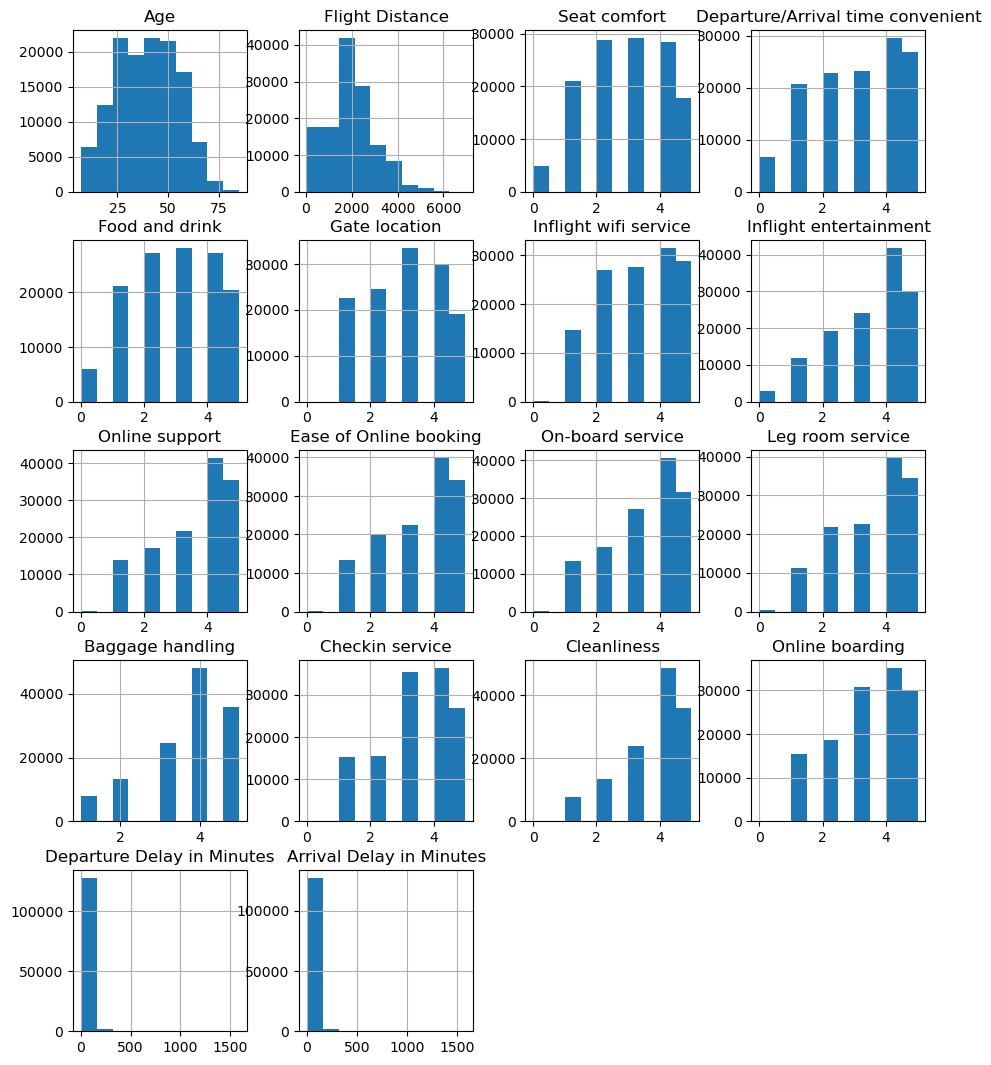

In [10]:
# Visualization of all numerical attributes: 

df_num = df[attributes_num]
df_num.hist(figsize=[11,13])


In [11]:
#Create a list of all non numeric attributes to create a reusable code.
attributes_obj = []
for i in df.columns:
    if df[i].dtype == "object":
        attributes_obj.append(i)
attributes_obj

['Customer Type', 'Type of Travel', 'Class']

In [12]:
df_cat= df[attributes_obj]

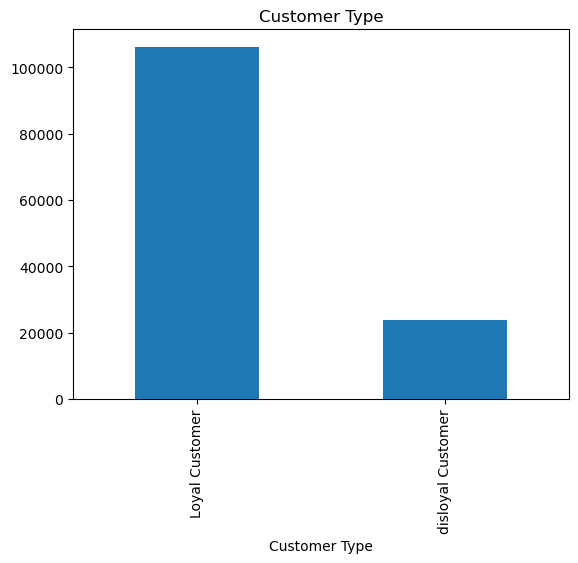

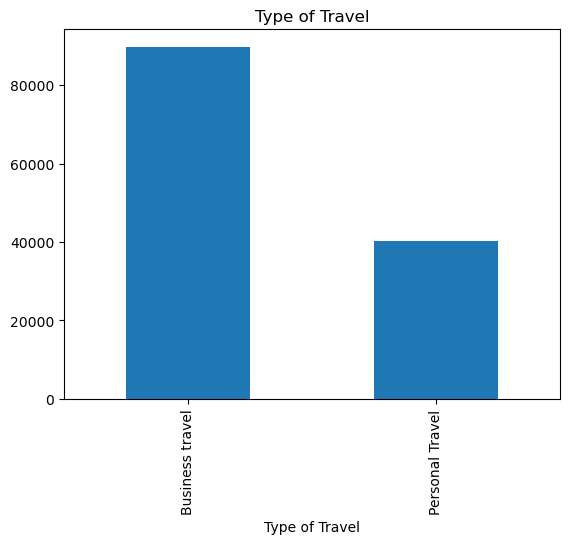

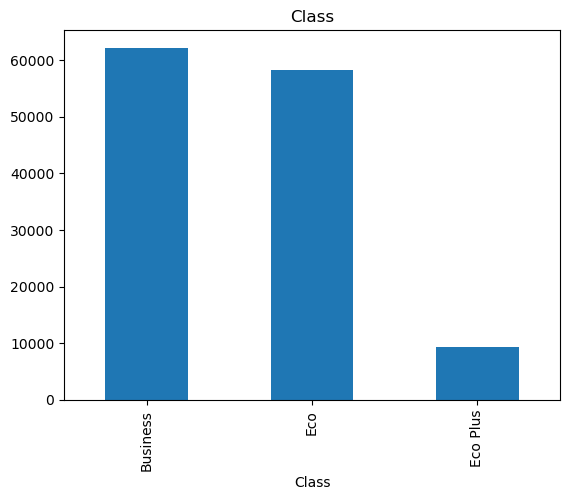

In [13]:
# Here we have plotted the individual data categories using graphs to get an overview of the data.
for column in df_cat.columns:
    df_cat[column].value_counts().plot.bar()
    plt.title(column)  
    plt.show()

In [18]:
#Examine the data to null values, zero found --> therefore no further action is necessary.
df.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [19]:
df = df.dropna(subset=['Arrival Delay in Minutes'])

In [20]:
# Duplikate anzeigen
duplicate_rows = df[df.duplicated()]
duplicate_df = df[df.duplicated()].copy()
print("Duplikate anzeigen:")
duplicate_df

Duplikate anzeigen:


,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes


In [21]:
df = df.drop_duplicates()

# Transformation

In [22]:
#MultiColumnLabelEncoder:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #Initalization as shortcut 'le'

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = le.fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = le.fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [23]:
# Applying the encoder to the non numeric columns
df = MultiColumnLabelEncoder(columns = attributes_obj).fit_transform(df)

In [24]:
df

# 

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,65,1,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,0,47,1,0,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,15,1,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,60,1,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,70,1,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,29,1,1,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,1,63,1,0,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,1,69,1,1,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,1,66,1,1,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


# kMeans

In [25]:
df_scaled = df

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pcadf = pca.fit_transform(df)
k = pca.n_components_
pca.n_components_

1

In [31]:
pca = PCA(pca.n_components_+1)
pcadf_fix2 = pca.fit_transform(df_scaled)
pcadf_fix2 = pd.DataFrame(pcadf_fix2, columns=['PC'+ str(i) for i in range (1, pcadf_fix2.shape[1]+1)] )
pcadf_fix2

,PC1,PC2
0,-1716.184657,-10.882850
1,485.371677,411.027458
2,156.954393,-22.065754
3,-1358.174779,-12.990635
4,-1627.205091,-11.374311
...,...,...
129482,-250.087802,-19.625710
129483,107.209802,223.130392
129484,340.066168,202.050473
129485,470.404921,257.867278


In [32]:
Y = pcadf_fix2.values

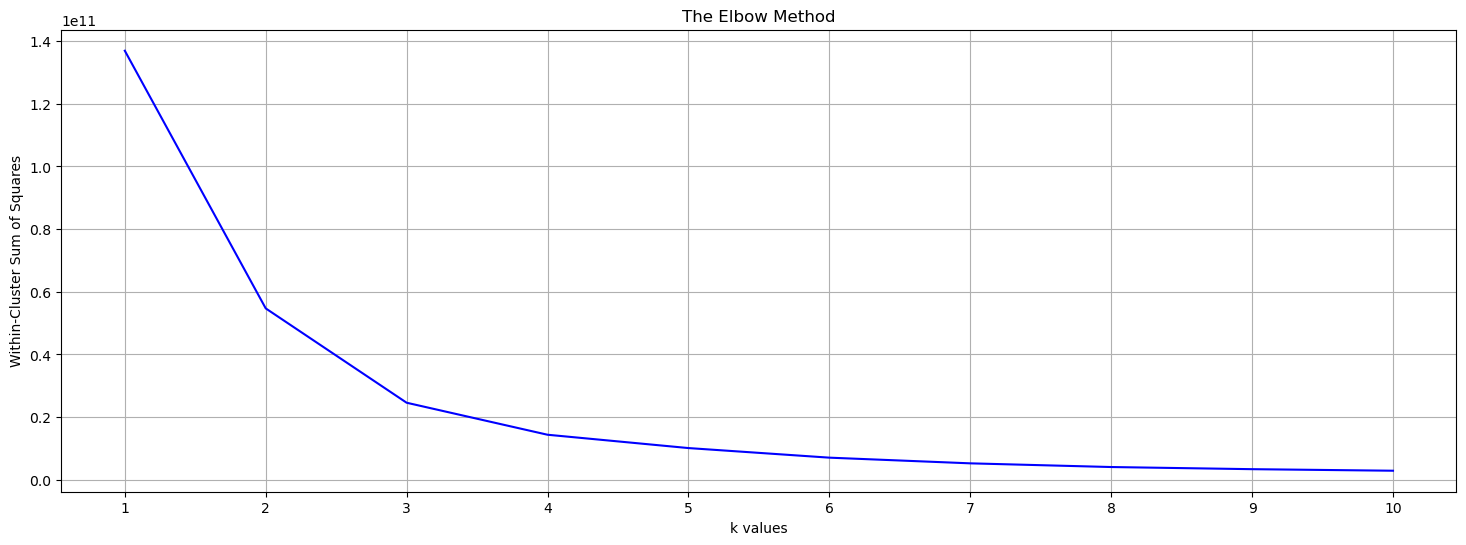

In [33]:
# Ignore future warnings 
import warnings
warnings.filterwarnings("ignore")

#finding the optimal number of cluster value
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia_score = []

# use Y for dataset with 2 PCAs 
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Y)
    inertia_score.append(kmeans.inertia_)

#Visualizing the inertia vs k plot
plt.figure(figsize=(18,6))
sns.lineplot(x=range(1,11),y=inertia_score,color='blue')
plt.xticks(range(1,11))
plt.xlabel('k values')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('The Elbow Method')
plt.grid()
plt.show()

In [34]:
#From the elbow method, we get an optimal cluster of 2, which also fits our distribution of 2 Cluster desired in the task.
#In Fraud and not Fraud
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters = 2, random_state=42)
kmeans.fit(Y)

KMeans(n_clusters=2, random_state=42)

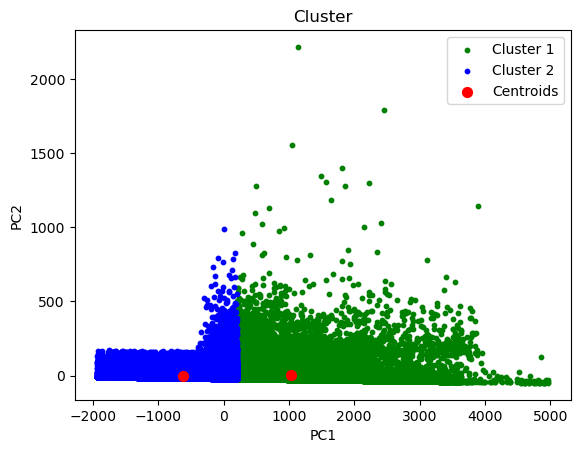

In [35]:
#(Visualize)
m_kmeans = KMeans(n_clusters = 2, random_state=42)
y_kmeans=m_kmeans.fit_predict(Y)

plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 10, c = 'green', 
            label = 'Cluster 1')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 10, c = 'blue', 
            label = 'Cluster 2')
#plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], s = 10, c = 'red', 
            #label = 'Cluster 3')
#plt.scatter(Y[y_kmeans == 3, 0], Y[y_kmeans == 3, 1], s = 10, c = 'yellow', 
            #label = 'Cluster 4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, 
            c = 'red', label = 'Centroids')
plt.title('Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()


#Silhouette

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Y) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(Y)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Y, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Y[:, 0], Y[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
#The results of the Elbow method are confirmed by the silhouette score. 
#This determines with 0.5277% 2 clusters as the best value.

In [37]:
# Defining the input and target variables:

X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]

In [38]:
# Generation of training and test data sets: 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)  

In [39]:
# Checking the proportions of the split sets: 

X_train.shape, X_test.shape

((86756, 21), (42731, 21))

In [40]:
# Decision Tree with Gini Index criterion: 

from sklearn.tree import DecisionTreeClassifier

dt_gini = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4, min_samples_split=2, min_samples_leaf=5, random_state=0)

# By experimenting with different values for max_depth and min_samples_leaf, we figured we can raise the accuracy score by using the values used above. 

# Execution of the training with the goal of predicting y-labels: 

dt_gini.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=0)

In [41]:
# Predicting the test set results with the gini index: 

y_pred_gini = dt_gini.predict(X_test)

In [42]:
# Comparison of predicted labels y_pred_gini and real test-labels y_test: 

from sklearn.metrics import accuracy_score 

print('The model accuracy with gini index is: {0:=.4f}'. format(accuracy_score(y_test, y_pred_gini)))

The model accuracy with gini index is: 0.8706


[Text(0.5, 0.9, 'Inflight entertainment <= 3.5\ngini = 0.495\nsamples = 86756\nvalue = [39185, 47571]\nclass = Fraud'),
 Text(0.25, 0.7, 'Seat comfort <= 3.5\ngini = 0.338\nsamples = 38755\nvalue = [30413, 8342]\nclass = noFraud'),
 Text(0.125, 0.5, 'Seat comfort <= 0.5\ngini = 0.248\nsamples = 33923\nvalue = [29004, 4919]\nclass = noFraud'),
 Text(0.0625, 0.3, 'Online boarding <= 0.5\ngini = 0.009\nsamples = 1749\nvalue = [8, 1741]\nclass = Fraud'),
 Text(0.03125, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = noFraud'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 1741\nvalue = [0, 1741]\nclass = Fraud'),
 Text(0.1875, 0.3, 'Class <= 0.5\ngini = 0.178\nsamples = 32174\nvalue = [28996, 3178]\nclass = noFraud'),
 Text(0.15625, 0.1, 'gini = 0.323\nsamples = 10431\nvalue = [8321, 2110]\nclass = noFraud'),
 Text(0.21875, 0.1, 'gini = 0.093\nsamples = 21743\nvalue = [20675, 1068]\nclass = noFraud'),
 Text(0.375, 0.5, 'Seat comfort <= 4.5\ngini = 0.413\nsamples = 4832\nvalue = [1409, 

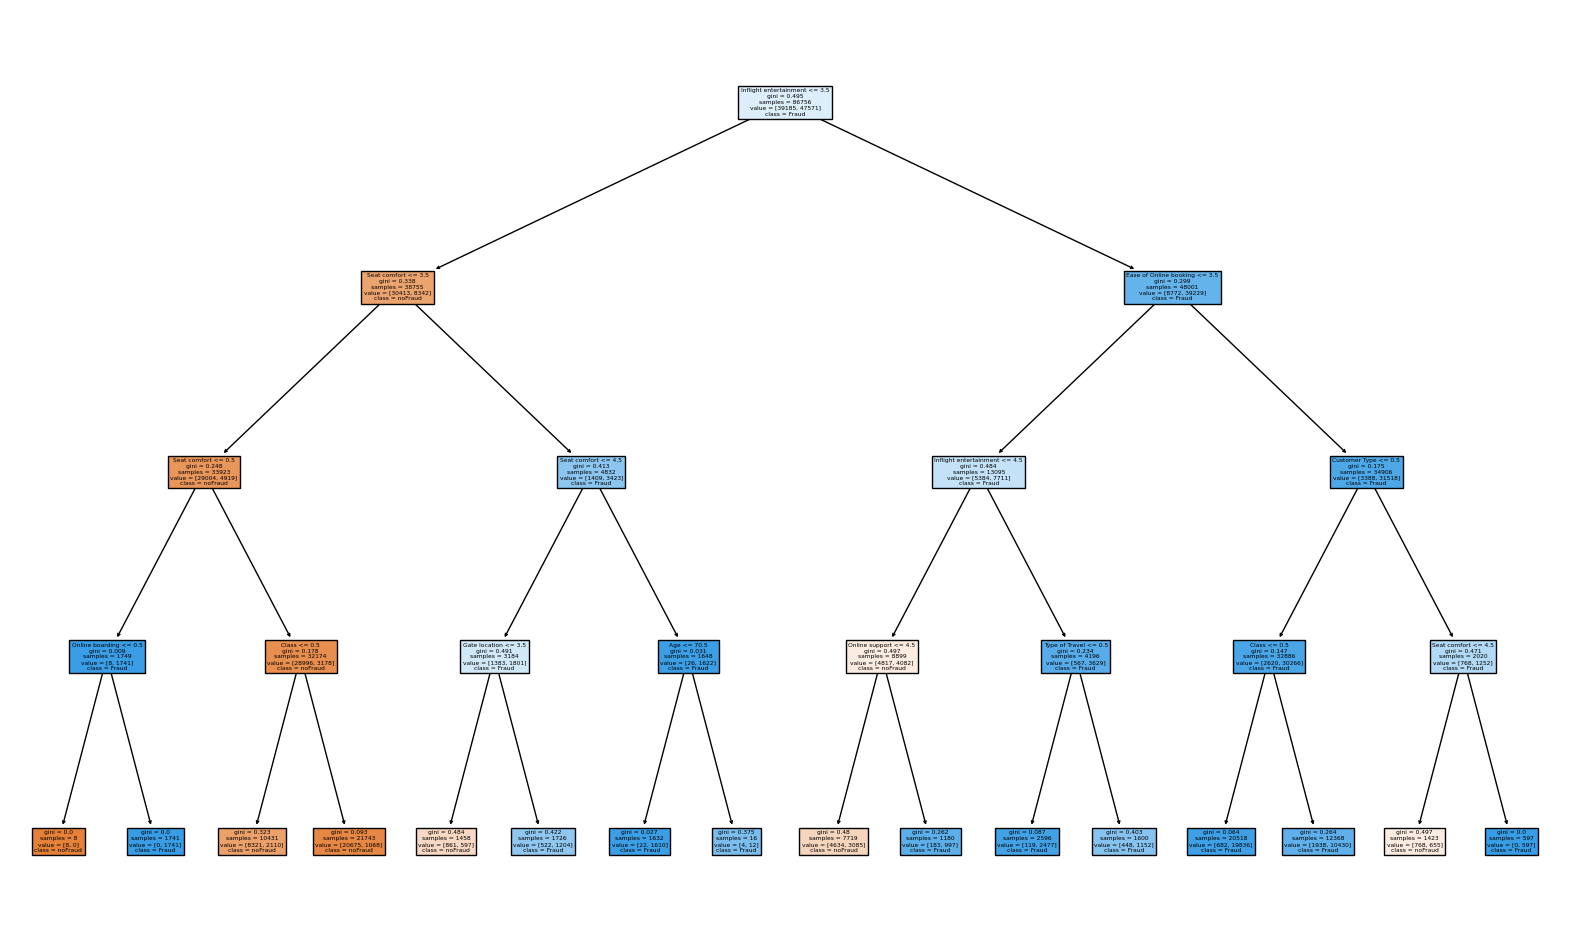

In [44]:
# Visualizing the gini-based Decision Tree: 

plt.figure(figsize=((20,12)))

from sklearn import tree

tree.plot_tree(dt_gini.fit(X_train, y_train), feature_names = X.columns.tolist(), class_names=['noFraud', 'Fraud'], filled=True)


In [45]:
# Textual visualization of the Decision Tree: 

gini_based_decision_tree = tree.export_text(dt_gini, feature_names=X.columns.tolist())
                    
print(gini_based_decision_tree)

|--- Inflight entertainment <= 3.50
|   |--- Seat comfort <= 3.50
|   |   |--- Seat comfort <= 0.50
|   |   |   |--- Online boarding <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Online boarding >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Seat comfort >  0.50
|   |   |   |--- Class <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Class >  0.50
|   |   |   |   |--- class: 0
|   |--- Seat comfort >  3.50
|   |   |--- Seat comfort <= 4.50
|   |   |   |--- Gate location <= 3.50
|   |   |   |   |--- class: 0
|   |   |   |--- Gate location >  3.50
|   |   |   |   |--- class: 1
|   |   |--- Seat comfort >  4.50
|   |   |   |--- Age <= 70.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  70.50
|   |   |   |   |--- class: 1
|--- Inflight entertainment >  3.50
|   |--- Ease of Online booking <= 3.50
|   |   |--- Inflight entertainment <= 4.50
|   |   |   |--- Online support <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- Online support >  4.50
|   |   |   |   

Text(0.5, 1.0, 'Confusion Matrix')

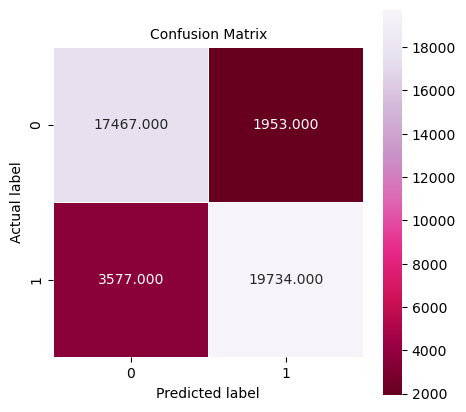

In [48]:
# Visualizing the Confusion Matrix: 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
confusion_matrix_gini_based = metrics.confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix_gini_based, annot=True, fmt=".3f", linewidths=.5, square=True, cmap ='PuRd_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size=10)

In [47]:
# Classification Report:

from sklearn.metrics import classification_report 
classification_report_gini_based = classification_report(y_test, y_pred_gini)
print(classification_report_gini_based)


              precision    recall  f1-score   support

           0       0.83      0.90      0.86     19420
           1       0.91      0.85      0.88     23311

    accuracy                           0.87     42731
   macro avg       0.87      0.87      0.87     42731
weighted avg       0.87      0.87      0.87     42731

